In [ ]:
#Loading the cleaned training and validation data
import pandas as pd
X_train = pd.read_csv("cleaned_data/X_train.csv")
X_val = pd.read_csv("cleaned_data/X_val.csv")

y_train = pd.read_csv("cleaned_data/y_train.csv")
y_val = pd.read_csv("cleaned_data/y_val.csv")

In [5]:
# Force CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#import tensorflow libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
#Defining the architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [7]:
#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Training the model
history = model.fit(
    X_train,y_train,
    validation_data = (X_val,y_val),
    epochs = 100,
    batch_size = 32,
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5290 - auc: 0.4866 - loss: 0.7127 - val_accuracy: 0.5625 - val_auc: 0.5349 - val_loss: 0.6782
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5836 - auc: 0.5471 - loss: 0.6746 - val_accuracy: 0.6562 - val_auc: 0.5807 - val_loss: 0.6524
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - auc: 0.6012 - loss: 0.6515 - val_accuracy: 0.6562 - val_auc: 0.6333 - val_loss: 0.6367
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6382 - auc: 0.6475 - loss: 0.6349 - val_accuracy: 0.6562 - val_auc: 0.6755 - val_loss: 0.6209
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6655 - auc: 0.6799 - loss: 0.6215 - val_accuracy: 0.6562 - val_auc: 0.7078 - val_loss: 0.6069
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - auc: 0.7058 - loss: 0.6083 - val_accuracy: 0.6875 - val_auc: 0.7411 - val_loss: 0.5956
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [9]:
pd.DataFrame(history.history)

,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0.529010,0.486588,0.712677,0.56250,0.534896,0.678187
1,0.583618,0.547068,0.674647,0.65625,0.580729,0.652428
2,0.614334,0.601192,0.651480,0.65625,0.633333,0.636650
3,0.638225,0.647512,0.634908,0.65625,0.675521,0.620895
4,0.665529,0.679896,0.621525,0.65625,0.707812,0.606903
...,...,...,...,...,...,...
95,0.825939,0.898335,0.396865,0.75000,0.767187,0.607959
96,0.825939,0.898634,0.395656,0.75000,0.769271,0.607363
97,0.825939,0.899781,0.394250,0.75000,0.766146,0.608376
98,0.822526,0.900803,0.393486,0.75000,0.767708,0.607581


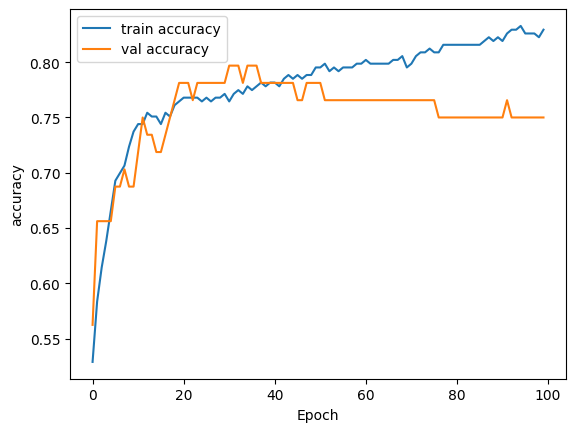

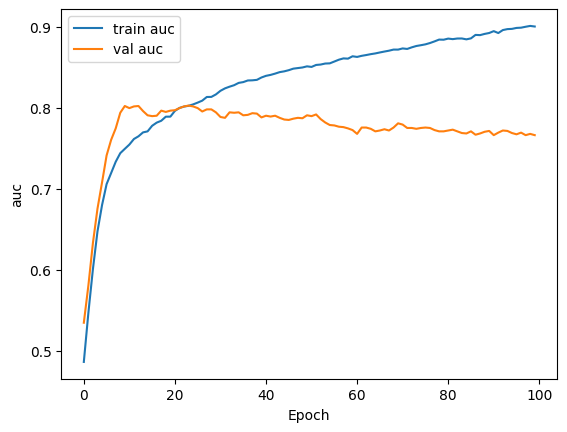

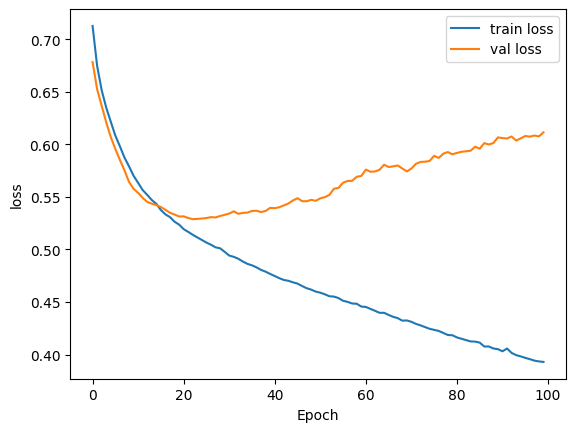

In [10]:
#Seeing how the metrics change for each epoch
import matplotlib.pyplot as plt
metrics = ["accuracy","auc","loss"]
for metric in metrics:
    plt.plot(history.history[metric], label=f"train {metric}")
    plt.plot(history.history[f"val_{metric}"], label=f"val {metric}")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.show()

In [11]:
#Saving the model to memory to reuse without retraining
model.save("models/initial_model.keras")